# 1. Library <a id='library'></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for Machine Learning
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Library for metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score

from joblib import dump

import time
import os
import warnings
warnings.filterwarnings('ignore')

# 2. Data Preprocessing <a id='kualitas_data'></a>

**Load Data**

In [2]:
os.listdir('/datasets/final_provider/')

['contract.csv', 'phone.csv', 'personal.csv', 'internet.csv']

In [3]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')

**Displaying Contract Client Data Information**

In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


The data type of TotalCharges should be float.

In [6]:
# Display TotalCharges
df_contract['TotalCharges'].sort_values().unique()

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

There are empty string values in the TotalCharge data, which need to be filled with the number 0.

In [7]:
# Changing empty strings in the TotalCharges column to 0.
df_contract.loc[df_contract['TotalCharges'] == ' ','TotalCharges'] = 0
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)

In [8]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


In [9]:
df_contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

No missing values.

In [10]:
df_contract.duplicated().sum()

0

No duplicated data.

In [11]:
df_contract.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


There are 2 numerical columns in the contract dataset.

In [12]:
df_contract['BeginDate'].sort_values().unique()

array(['2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
       '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
       '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
       '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
       '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
       '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
       '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
       '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-

The oldest client on the list started on October 1st, 2013, and the newest started on February 1st, 2020.

In [13]:
df_contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

The column 'EndDate' is the target variable. The value 'No' represents active clients, totaling 5174, while the rest are inactive/clients who have stopped using the service provider.

In [14]:
df_contract['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [15]:
df_contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [16]:
df_contract['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

**Displaying Personal Client Data Information**

In [17]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
df_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [19]:
df_personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

No missing values.

In [20]:
df_personal.duplicated().sum()

0

No duplicated data.

In [21]:
df_personal['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [22]:
df_personal['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [23]:
df_personal['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [24]:
df_personal['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

**Displaying Information about Telephone Service Data**

In [25]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [26]:
df_phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [27]:
df_phone['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

There are 2971 clients who use telephone services, and 3390 who do not use telephone services.

**Displaying Information about Internet Service Data**

In [28]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [29]:
df_internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [30]:
df_internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4328-VUFWD,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [31]:
df_internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

**Merging Dataframe**

In [32]:
# Merge DataFrames based on customerID or other suitable columns.
df_full = pd.merge(df_contract, df_personal, on='customerID', how='outer')
df_full = pd.merge(df_full, df_phone, on='customerID', how='outer')
df_full = pd.merge(df_full, df_internet, on='customerID', how='outer')


In [33]:
df_full

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,NaN,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [34]:
df_full.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

After merging the data, empty values appear. This is because some clients are unknown whether they take telephone services or internet services. To fill these empty values, they are filled with 'NO' because it is assumed they do not use the service.

In [35]:
# Filling empty data with 'No' because it means they are not using additional services.
df_full = df_full.fillna('No')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


No missing values.

In [36]:
df_full.duplicated().sum()

0

# 3. EDA <a id='eda'></a>

**Distribution of Client Churn Data**

In [37]:
df_eda = df_full.copy()

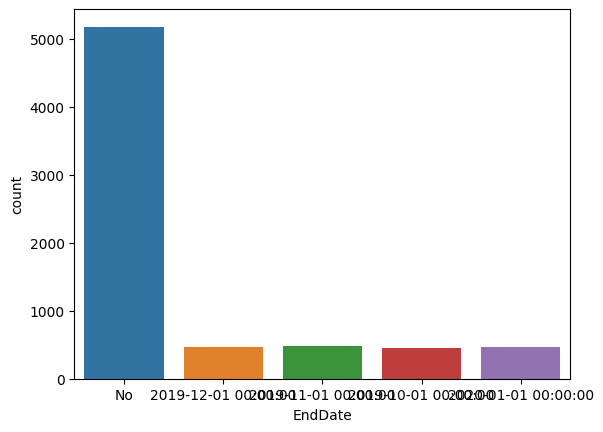

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

In [38]:
sns.countplot(data=df_eda, x='EndDate')
plt.show()
df_eda['EndDate'].value_counts()

In [39]:
# Definisikan tanggal-tanggal yang ingin dirubah menjadi 'Yes'
dates_to_convert = ['2019-11-01 00:00:00', '2019-12-01 00:00:00', '2020-01-01 00:00:00', '2019-10-01 00:00:00']

# Ubah nilai-nilai yang sesuai menjadi 'Yes' dan nilai-nilai lainnya menjadi 'No'
df_eda['EndDate'] = df_eda['EndDate'].apply(lambda x:'Nonactive' if x in dates_to_convert else 'Active')

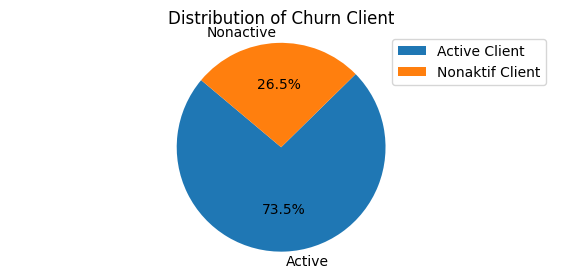

In [40]:
# Menampilkan jumlah nilai masing-masing kategori
churn_klien = df_eda['EndDate'].value_counts()

# Buat pie chart
plt.figure(figsize=(7, 3))
plt.pie(churn_klien, labels=churn_klien.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Churn Client')
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran
# Tambahkan legenda untuk nilai 0 dan 1
plt.legend(['Active Client', 'Nonaktif Client'], loc='upper right')
plt.show()

It turns out that the proportion of active clients is larger than those who have exited; the proportion is not balanced.

**Statistical Calculation of Active and Inactive Clients Against Monthly Payments**

In [41]:
df_eda['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

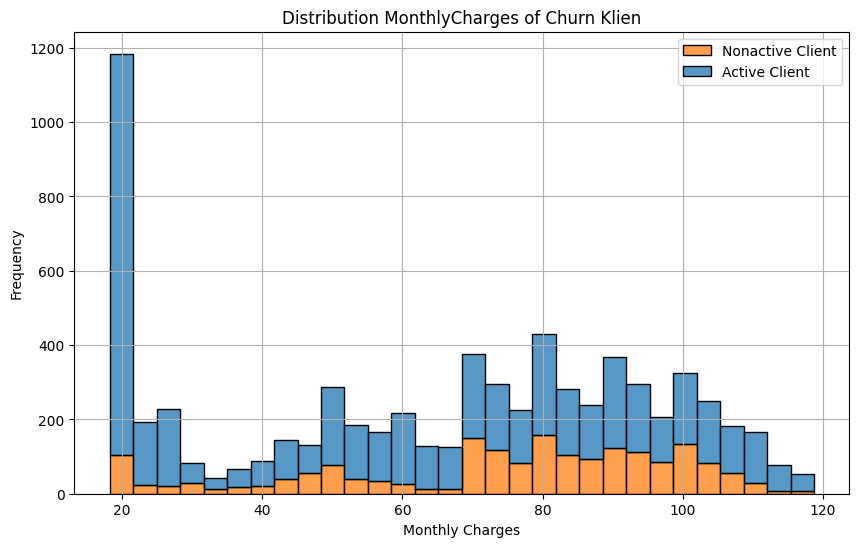

In [42]:
# Membuat histogram dengan menggunakan warna berbeda untuk setiap kategori 'EndDate'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda, x='MonthlyCharges', hue='EndDate', bins=30, kde=False, multiple='stack')
plt.title('Distribution MonthlyCharges of Churn Klien')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.grid(True)  # Menampilkan grid
plt.legend(['Nonactive Client', 'Active Client'], loc='upper right')
plt.show()

In [43]:
# Mengelompokkan data berdasarkan 'EndDate' dan menghitung mean, median, min, max 'MonthlyCharges'
summary_stats = df_eda.groupby('EndDate').agg({'MonthlyCharges':['mean', 'median', 'min', 'max']})

# Menambahkan quartil bawah (Q1) dan quartil atas (Q3)
summary_stats[('MonthlyCharges', 'Q1')] = df_eda.groupby('EndDate')['MonthlyCharges'].quantile(0.25)
summary_stats[('MonthlyCharges', 'Q3')] = df_eda.groupby('EndDate')['MonthlyCharges'].quantile(0.75)


In [44]:
# Menampilkan ringkasan statistik yang diperbarui
summary_stats

MonthlyCharges                                    
                    mean  median    min     max     Q1    Q3
EndDate                                                     
Active         61.265124  64.425  18.25  118.75  25.10  88.4
Nonactive      74.441332  79.650  18.85  118.35  56.15  94.2

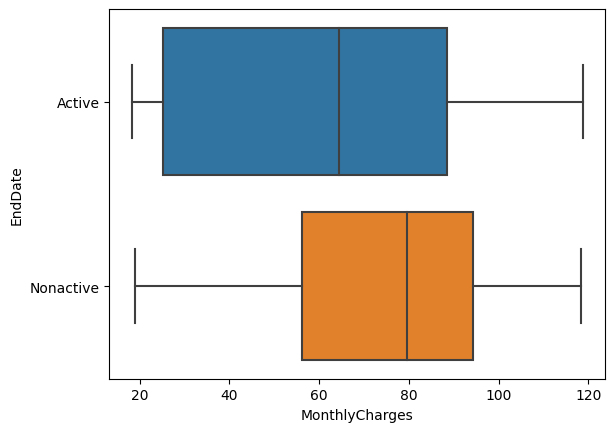

In [45]:
sns.boxplot(data=df_eda, x='MonthlyCharges', y='EndDate')
plt.show()

There are no significant or outlier data.

**Churn Behavior of Clients Regarding the Number of Telephone Users**

In [46]:
df_eda['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

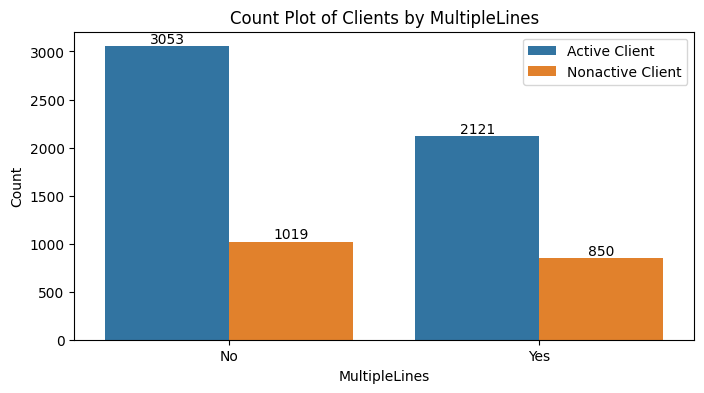

In [47]:
# Membuat count plot
plt.figure(figsize=(8, 4))
sns_countplot = sns.countplot(data=df_eda, x='MultipleLines', hue='EndDate')
plt.title('Count Plot of Clients by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.legend(['Active Client', 'Nonactive Client'], loc='upper right')

# Menambahkan label jumlah pada setiap bar
for p in sns_countplot.patches:
    sns_countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Active clients mostly do not use telephone services, as seen in the graph above, with a value of 3053. Meanwhile, those who do use it are 2121.

**Churn Behavior of Clients Regarding Internet Usage Share**

In [48]:
# Hitung jumlah pelanggan yang menggunakan layanan internet
internet_users = (df_eda['InternetService'] != 'No').sum()

# Hitung jumlah pelanggan yang tidak menggunakan internet
non_internet_users = (df_eda['InternetService'] == 'No').sum()

# Hitung total jumlah pelanggan
total_users = len(df_eda)

# Hitung persentase pengguna internet
percentage_internet_users = (internet_users / total_users) * 100
percentage_non_internet_users = (non_internet_users / total_users) * 100

print("Percentage of internet users:", percentage_internet_users)
print("Percentage of users who do not use the internet:", percentage_non_internet_users)


Percentage of internet users: 78.33309669175067
Percentage of users who do not use the internet: 21.666903308249324


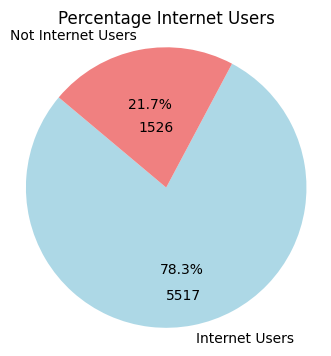

In [49]:
# Labels untuk pie chart
labels = ['Internet Users', 'Not Internet Users']

# Data untuk pie chart
sizes = [percentage_internet_users, percentage_non_internet_users]

# Warna untuk setiap bagian pada pie chart
colors = ['lightblue', 'lightcoral']

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Internet Users')
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran

# Tambahkan teks jumlah pengguna non-internet
plt.text(x=-0.2, y=0.4, s=1526, fontsize=10, color='black')

# Tambahkan teks jumlah pengguna internet
plt.text(x=0, y=-0.8, s=5517, fontsize=10, color='black')

# Tampilkan pie chart
plt.show()

There are more internet users than non-internet users.

In [50]:
# Filter data untuk mendapatkan jumlah pelanggan aktif dan nonaktif untuk setiap jenis layanan internet
active_customers = df_eda[df_eda['EndDate'] == 'Active']
inactive_customers = df_eda[df_eda['EndDate'] == 'Nonactive']

# Jika pengguna menggunakan layanan internet
active_internet_users = active_customers[df_eda['InternetService'] != 'No'].shape[0]
inactive_internet_users = inactive_customers[df_eda['InternetService'] != 'No'].shape[0]

# Jika pengguna tidak menggunakan layanan internet
active_non_internet_users = active_customers[df_eda['InternetService'] == 'No'].shape[0]
inactive_non_internet_users = inactive_customers[df_eda['InternetService'] == 'No'].shape[0]

# Tampilkan hasil
print("Number of active customers using internet services:", active_internet_users)
print("Number of active customers not using internet services:", active_non_internet_users)

print("Number of inactive customers using internet services:", inactive_internet_users)
print("Number of inactive customers not using internet services:", inactive_non_internet_users)


Number of active customers using internet services: 3761
Number of active customers not using internet services: 1413
Number of inactive customers using internet services: 1756
Number of inactive customers not using internet services: 113


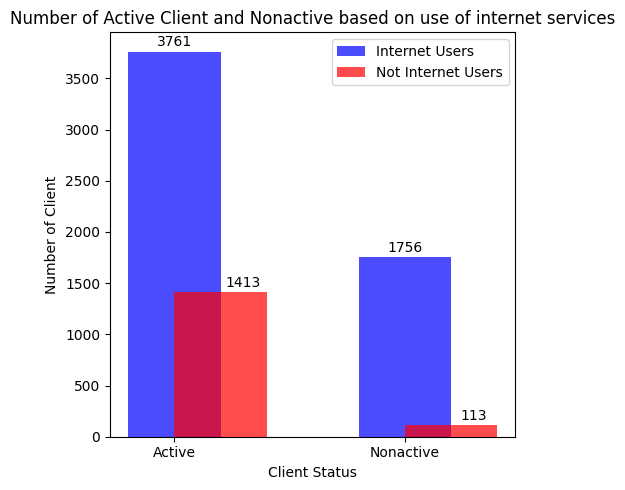

In [51]:
# Data untuk plot
categories = ['Active', 'Nonactive']
internet_users = [active_internet_users, inactive_internet_users]
non_internet_users = [active_non_internet_users, inactive_non_internet_users]

x = range(len(categories))

# Membuat plot
plt.figure(figsize=(5, 5))
plt.bar(x, internet_users, width=0.4, align='center', label='Internet Users', color='blue', alpha=0.7)
plt.bar(x, non_internet_users, width=0.4, align='edge', label='Not Internet Users', color='red', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Client Status')
plt.ylabel('Number of Client')
plt.title('Number of Active Client and Nonactive based on use of internet services')
plt.xticks(x, categories)
plt.legend()

# Menampilkan teks tambahan
plt.text(0, active_internet_users + 50, f"{active_internet_users}", ha='center', color='black')
plt.text(1, inactive_internet_users + 50, f"{inactive_internet_users}", ha='center', color='black')
plt.text(0.3, active_non_internet_users + 50, f"{active_non_internet_users}", ha='center', color='black')
plt.text(1.3, inactive_non_internet_users + 50, f"{inactive_non_internet_users}", ha='center', color='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

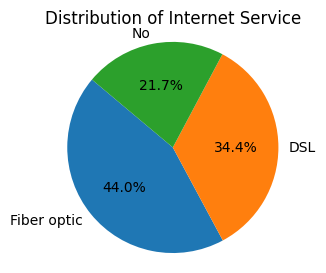

In [52]:
# Menghitung frekuensi masing-masing kategori 'InternetService'
internet_service_counts = df_eda['InternetService'].value_counts()

# Membuat pie chart dari frekuensi 'InternetService'
plt.figure(figsize=(3, 3))
plt.pie(internet_service_counts, labels=internet_service_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Internet Service')
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran
plt.show()

**Data Correlation**

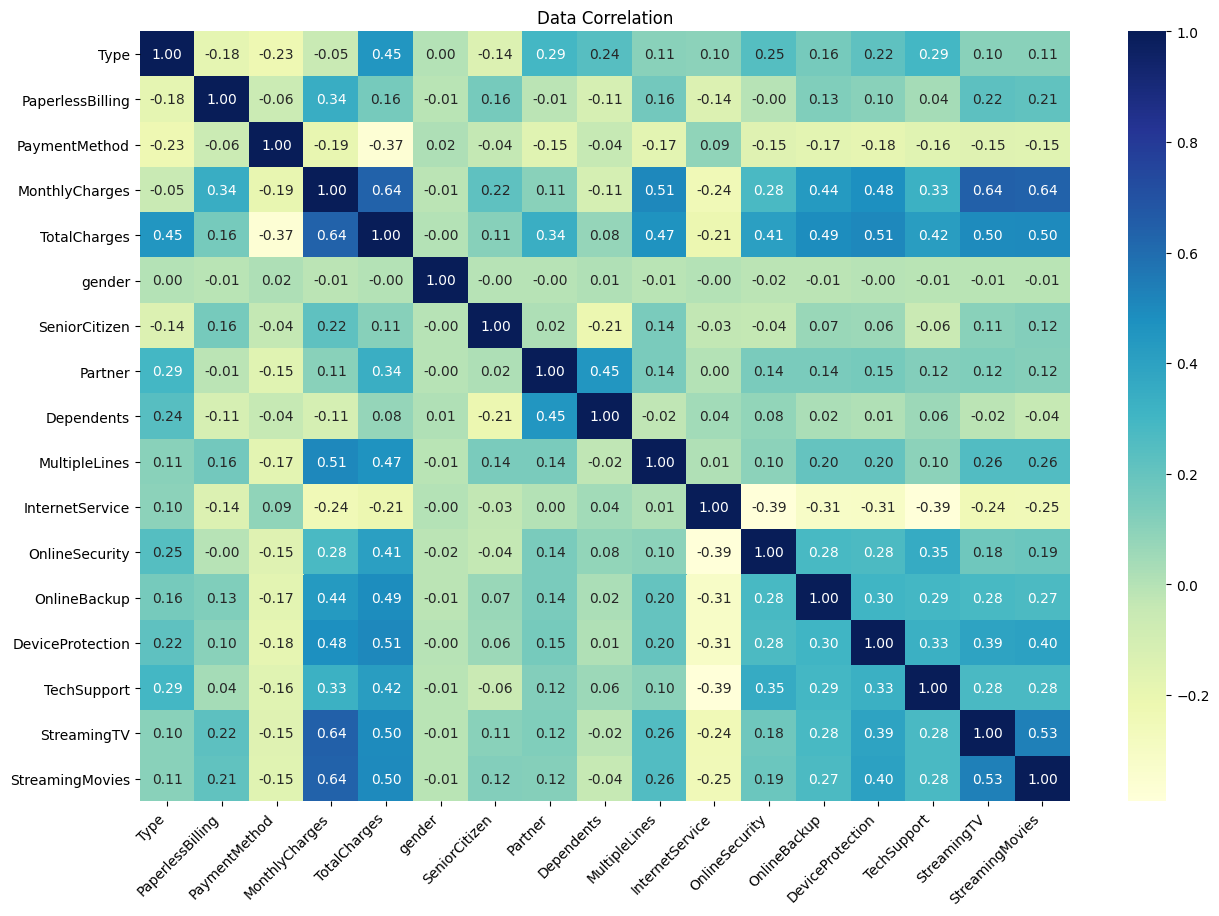

In [53]:
def correlation(data, title):
    encoder = OrdinalEncoder()
    columns_heatmap = data.columns[3:]
    data_ordinal = pd.DataFrame(encoder.fit_transform(data[columns_heatmap]),
                                columns=columns_heatmap)

    # Membuat matriks korelasi dengan heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(data_ordinal.corr(),
                annot=True,
                cmap='YlGnBu',
                fmt='.2f',
                linecolor='black')
    plt.xticks(rotation=45,
               ha='right')
    plt.title(title)
    plt.show()

correlation(df_eda, "Data Correlation")

Based on the displayed correlation heatmap, here are some conclusions that can be drawn:<br>
<br>
Strong Positive Correlations:
- There is a strong positive correlation between MonthlyCharges and TotalCharges (0.64). This indicates that customers with higher monthly charges tend to have higher total charges as well.
- StreamingTV and StreamingMovies also show a strong positive correlation (0.53), suggesting that customers who subscribe to streaming TV are likely to also subscribe to streaming movies.

Negative Correlation:<br>
- InternetService has negative correlations with OnlineSecurity (-0.39), TechSupport (-0.31), and OnlineBackup (-0.31).

Weak or No Correlation:
- Some features such as gender, SeniorCitizen, and Partner exhibit very weak or insignificant correlations with other features. This implies that these factors may not have much influence on other variables in this dataset.

# 4. Features Engineering <a id='engineering'></a>

Removing columns as low correlated features to improve model performance.

In [54]:
# Menghapus features yang berkorelasi rendah
df_full = df_full.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents'])

Added 'Status' column to replace 'EndDate' column as target.

In [55]:
# Menambahkan kolom "Status" untuk variabel target dengan 0 untuk pelanggan aktif dan 1 untuk yang berhenti
df_full['Status'] = df_full['EndDate'].apply(lambda x: 0 if x == "No" else 1)
df_full['Status'].value_counts()

0    5174
1    1869
Name: Status, dtype: int64

Added 'Tenure' column to improve model performance.

In [56]:
# Merubah nilai No pada kolom EndDate menjadi tanggal 2020-02-01 karena kontrak diberlakukan tanggal 1 Feb 2020
df_full.loc[df_full['EndDate'] == 'No','EndDate'] = '2020-02-01 00:00:00'

# Mengganti type data menjadi datetime
df_full['EndDate'] = pd.to_datetime(df_full['EndDate'])
df_full['BeginDate'] = pd.to_datetime(df_full['BeginDate'])

# Menambahkan kolom baru untuk melihat durasi Tenure
df_full['Tenure'] = (df_full['EndDate'].dt.to_period('D') - df_full['BeginDate'].dt.to_period('D')).apply(lambda x: x.n)
df_full.sample()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Status,Tenure
3035,7924-GJZFI,2018-01-01,2020-02-01,Month-to-month,Yes,Electronic check,69.3,1813.1,No,Fiber optic,No,No,No,No,No,No,0,761


In [57]:
# Memisahkan features dan target, dimana features adalah X dan target adalah y.
X = df_full.drop(columns=['customerID', 'BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges', 'Status'])
y = df_full['Status']

In [58]:
# Merubah nilai kategori menjadi numerik
encoder = OrdinalEncoder()
X = pd.DataFrame(encoder.fit_transform(X),columns=X.columns)
X.sample()

,Type,PaperlessBilling,PaymentMethod,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure
614,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,107.0


In [59]:
# Melakukan skala data 
scaler = MinMaxScaler(feature_range=(0, 1))
X[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_full[['MonthlyCharges','TotalCharges']])
X

,Type,PaperlessBilling,PaymentMethod,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.115423,0.003437
1,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,74.0,0.385075,0.217564
2,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.354229,0.012453
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,96.0,0.239303,0.211951
4,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,52.0,0.662189,0.229194
7039,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,155.0,0.845274,0.847792
7040,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.112935,0.039892
7041,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.558706,0.035303


After features engineering was carried out, the number of columns changed to 14.

# 5. Train-Test Split <a id='train'></a>

Splitting the data into Train and Test sets in a 90:10 ratio.

In [60]:
# Split Data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

In [61]:
print(f'X_train {X_train.shape}', f'y_train {y_train.shape}')

X_train (6338, 14) y_train (6338,)


In [62]:
print(f'x_test {x_test.shape}', f'y_test {y_test.shape}')

x_test (705, 14) y_test (705,)


# 6. Modeling <a id='pemodelan'></a>

##  LogisticRegression

In [63]:
# Waktu mulai eksekusi
start_time = time.time() 

# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=12345)

# Melatih model
lr_model.fit(X_train, y_train)

# Memprediksi pada data pengujian
lr_y_pred = lr_model.predict(x_test)
lr_y_pred_prob = lr_model.predict_proba(x_test)[:, 1]

# Evaluasi model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_roc_auc = roc_auc_score(y_test, lr_y_pred_prob)

# Waktu akhir eksekusi
end_time = time.time()
exec_time = end_time - start_time

# Buat DataFrame dari hasil evaluasi
eval_lr = pd.DataFrame({
        'Model': ['LogisticRegression'],
        'Accuracy': [lr_accuracy],
        'ROC-AUC': [lr_roc_auc],
        'Execution Time': [exec_time]
})

eval_lr


,Model,Accuracy,ROC-AUC,Execution Time
0,LogisticRegression,0.795745,0.840082,1.01391


- The Logistic Regression model demonstrates fairly adequate performance.
- The model achieves its highest ROC-AUC value with an execution time of 1.096277 seconds.
- It correctly predicts around 79.57% of the test data.
- It has an ROC-AUC score of 0.840082, indicating that the model has a decent ability to distinguish churn classes.

**Fungsi model**

In [64]:
def evaluate_model_depths(model, model_name, X_train, y_train, X_test, y_test, max_depth_range=25, random_state=12345):
    
    results = []
    
    for depth in range(1, max_depth_range + 1):
        start_time = time.time()
        
        # Inisialisasi model dengan max_depth tertentu
        model.set_params(max_depth=depth, random_state=random_state)
        
        # Melatih model
        model.fit(X_train, y_train)
        
        # Prediksi pada data pengujian
        y_test_pred = model.predict(X_test)
        y_test_pred_prob = model.predict_proba(X_test)[:, 1]
        
        # Evaluasi model
        accuracy = accuracy_score(y_test, y_test_pred)
        roc_auc = roc_auc_score(y_test, y_test_pred_prob)
        
        # Waktu akhir eksekusi
        end_time = time.time()
        exec_time = end_time - start_time
        
        # Menyimpan hasil evaluasi
        results.append({
            'Model': model_name,
            'Max_depth': depth,
            'Accuracy': accuracy,
            'ROC-AUC': roc_auc,
            'Execution Time': exec_time
        })
    
    return pd.DataFrame(results)

## DecisionTreeClassifier

In [65]:
dtc_model = DecisionTreeClassifier()
results_dtc = evaluate_model_depths(dtc_model, 'DecisionTreeClassifier', X_train, y_train, x_test, y_test, max_depth_range=24)

# Mengurutkan hasil berdasarkan ROC-AUC terbesar
sorted_results = results_dtc.sort_values(by='ROC-AUC', ascending=False)

# Cetak hasil yang sudah diurutkan
print('Model DecisionTreeClassifier')
sorted_results

Model DecisionTreeClassifier


,Model,Max_depth,Accuracy,ROC-AUC,Execution Time
5,DecisionTreeClassifier,6,0.812766,0.854875,0.028920
4,DecisionTreeClassifier,5,0.814184,0.854859,0.021700
7,DecisionTreeClassifier,8,0.804255,0.849325,0.029054
8,DecisionTreeClassifier,9,0.814184,0.849080,0.030342
3,DecisionTreeClassifier,4,0.805674,0.848968,0.019326
6,DecisionTreeClassifier,7,0.809929,0.847767,0.026378
9,DecisionTreeClassifier,10,0.815603,0.845023,0.032347
10,DecisionTreeClassifier,11,0.794326,0.830169,0.033928
2,DecisionTreeClassifier,3,0.768794,0.827215,0.016425
11,DecisionTreeClassifier,12,0.811348,0.815641,0.035658


- The DecisionTreeClassifier shows decent performance.
- At a depth of 6, it achieves the highest ROC-AUC value with an execution time of 0.029524 seconds.
- It correctly predicts around 81.27% of the test data.
- It has an ROC-AUC score of 0.854875, indicating that the model has a good ability to distinguish churn classes.

## RandomForestClassifier

In [66]:
rfc_model = RandomForestClassifier()
results_rfc = evaluate_model_depths(rfc_model, 'RandomForestClassifier', X_train, y_train, x_test, y_test, max_depth_range=24)

# Mengurutkan hasil berdasarkan ROC-AUC terbesar
sorted_results = results_rfc.sort_values(by='ROC-AUC', ascending=False)

# Cetak hasil yang sudah diurutkan
print('Model RandomForestClassifier')
sorted_results

Model RandomForestClassifier


,Model,Max_depth,Accuracy,ROC-AUC,Execution Time
9,RandomForestClassifier,10,0.825532,0.875825,0.651106
11,RandomForestClassifier,12,0.825532,0.874701,0.699540
7,RandomForestClassifier,8,0.819858,0.874323,0.592885
10,RandomForestClassifier,11,0.829787,0.873674,0.672272
12,RandomForestClassifier,13,0.829787,0.871656,0.750403
8,RandomForestClassifier,9,0.819858,0.871579,0.623908
13,RandomForestClassifier,14,0.835461,0.871022,0.742967
15,RandomForestClassifier,16,0.831206,0.870838,0.778118
22,RandomForestClassifier,23,0.826950,0.869555,0.805377
14,RandomForestClassifier,15,0.819858,0.868932,0.793732


- The RandomForestClassifier shows fairly good performance.
- At a depth of 10, it achieves the highest ROC-AUC value with an execution time of 0.718522 seconds.
- It correctly predicts around 82.55% of the test data.
- It has an ROC-AUC score of 0.875825, indicating that the model has a decent ability to distinguish churn classes.

## LGBMClassifier

In [67]:
lgbm_model = LGBMClassifier()
results_lgbm = evaluate_model_depths(lgbm_model, 'LGBMClassifier', X_train, y_train, x_test, y_test, max_depth_range=24)

# Mengurutkan hasil berdasarkan ROC-AUC terbesar
sorted_results = results_lgbm.sort_values(by='ROC-AUC', ascending=False)

# Cetak hasil yang sudah diurutkan
print('Model LGBMClassifier')
sorted_results

Model LGBMClassifier


,Model,Max_depth,Accuracy,ROC-AUC,Execution Time
18,LGBMClassifier,19,0.878014,0.918360,0.419111
13,LGBMClassifier,14,0.875177,0.917961,0.415586
20,LGBMClassifier,21,0.870922,0.916847,0.404847
17,LGBMClassifier,18,0.869504,0.916801,0.486628
19,LGBMClassifier,20,0.870922,0.915197,0.495891
7,LGBMClassifier,8,0.872340,0.915181,0.400749
14,LGBMClassifier,15,0.875177,0.915171,0.484520
16,LGBMClassifier,17,0.870922,0.913475,0.696455
9,LGBMClassifier,10,0.868085,0.913311,0.514255
21,LGBMClassifier,22,0.870922,0.913056,0.489929


- The LGBMClassifier shows excellent performance.
- At a depth of 19, it achieves the highest ROC-AUC value with an execution time of 0.492987 seconds.
- It correctly predicts around 87.80% of the test data.
- It has an ROC-AUC score of 0.918360, indicating that the model has excellent ability to distinguish churn classes.

## XGBClassifier

In [68]:
xgb_model = XGBClassifier()
results_xgb = evaluate_model_depths(xgb_model, 'XGBClassifier', X_train, y_train, x_test, y_test, max_depth_range=24)

# Mengurutkan hasil berdasarkan ROC-AUC terbesar
sorted_results = results_xgb.sort_values(by='ROC-AUC', ascending=False)

# Cetak hasil yang sudah diurutkan
print('Model XGBClassifier')
sorted_results


[18:08:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:08:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Model,Max_depth,Accuracy,ROC-AUC,Execution Time
5,XGBClassifier,6,0.876596,0.923684,2.305454
7,XGBClassifier,8,0.882270,0.921048,3.116670
8,XGBClassifier,9,0.876596,0.920480,3.460936
9,XGBClassifier,10,0.869504,0.919693,3.531222
6,XGBClassifier,7,0.880851,0.916208,2.588858
10,XGBClassifier,11,0.872340,0.914609,4.270629
3,XGBClassifier,4,0.879433,0.914257,1.698724
13,XGBClassifier,14,0.863830,0.910935,4.833097
11,XGBClassifier,12,0.866667,0.910700,4.046650
12,XGBClassifier,13,0.862411,0.909463,4.450878


- The XGBClassifier demonstrates excellent performance.
- At a depth of 6, it achieves the highest ROC-AUC value with an execution time of 2.362330 seconds.
- It correctly predicts around 87.66% of the test data.
- It has an ROC-AUC score of 0.923684, indicating that the model has excellent ability to distinguish churn classes.

## GradientBoostingClassifier

In [69]:
gbc_model = GradientBoostingClassifier()
results_gbc = evaluate_model_depths(gbc_model, 'GradientBoostingClassifier', X_train, y_train, x_test, y_test, max_depth_range=24)

# Mengurutkan hasil berdasarkan ROC-AUC terbesar
sorted_results = results_gbc.sort_values(by='ROC-AUC', ascending=False)

# Cetak hasil yang sudah diurutkan
print('Model GradientBoostingClassifier')
sorted_results


Model GradientBoostingClassifier


,Model,Max_depth,Accuracy,ROC-AUC,Execution Time
5,GradientBoostingClassifier,6,0.870922,0.911921,2.046526
4,GradientBoostingClassifier,5,0.860993,0.908222,1.709134
3,GradientBoostingClassifier,4,0.865248,0.905723,1.353216
8,GradientBoostingClassifier,9,0.851064,0.903664,3.625626
7,GradientBoostingClassifier,8,0.863830,0.902003,3.034829
9,GradientBoostingClassifier,10,0.855319,0.900526,4.293518
6,GradientBoostingClassifier,7,0.856738,0.898763,2.484297
10,GradientBoostingClassifier,11,0.851064,0.895176,5.023024
11,GradientBoostingClassifier,12,0.845390,0.892790,5.933675
12,GradientBoostingClassifier,13,0.848227,0.892780,6.928125


- The GradientBoostingClassifier shows excellent performance.
- At a depth of 6, it achieves the highest ROC-AUC value with an execution time of 2.115634 seconds.
- It correctly predicts around 87.09% of the test data.
- It has an ROC-AUC score of 0.911921, indicating that the model has very good ability to distinguish churn classes.

## KNN

In [70]:
# Mulai waktu eksekusi
start_time = time.time()

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()
# Melatih model
knn_model.fit(X_train, y_train)
# Memprediksi pada data pengujian
knn_y_pred = knn_model.predict(x_test)
knn_y_pred_prob = knn_model.predict_proba(x_test)[:, 1]
# Evaluasi model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_roc_auc = roc_auc_score(y_test, knn_y_pred_prob)

# Waktu akhir eksekusi
end_time = time.time()
exec_time = end_time - start_time

# Buat DataFrame dari hasil evaluasi
eval_knn = pd.DataFrame({
        'Model': ['KNN'],
        'Accuracy': [knn_accuracy],
        'ROC-AUC': [knn_roc_auc],
        'Execution Time': [exec_time]
})

eval_knn


,Model,Accuracy,ROC-AUC,Execution Time
0,KNN,0.835461,0.866295,0.068893


# 7. Result Evaluation

In [71]:
# Mendapatkan nilai teratas dari kolom 'ROC-AUC Train'
top_dtc = results_dtc.nlargest(1, 'ROC-AUC')
top_rfc = results_rfc.nlargest(1, 'ROC-AUC')
top_xgb = results_xgb.nlargest(1, 'ROC-AUC')
top_gbc = results_gbc.nlargest(1, 'ROC-AUC')
top_lgbm = results_lgbm.nlargest(1, 'ROC-AUC')

# Menggabungkan hasil evaluasi dari berbagai model
all_results = pd.concat([eval_lr, top_dtc, top_rfc, top_lgbm, top_xgb, top_gbc, eval_knn ])

In [72]:
all_results.sort_values(by='ROC-AUC', ascending=False)

,Model,Accuracy,ROC-AUC,Execution Time,Max_depth
5,XGBClassifier,0.876596,0.923684,2.305454,6.0
18,LGBMClassifier,0.878014,0.918360,0.419111,19.0
5,GradientBoostingClassifier,0.870922,0.911921,2.046526,6.0
9,RandomForestClassifier,0.825532,0.875825,0.651106,10.0
0,KNN,0.835461,0.866295,0.068893,NaN
5,DecisionTreeClassifier,0.812766,0.854875,0.028920,6.0
0,LogisticRegression,0.795745,0.840082,1.013910,NaN


Based on the model evaluation results above, the findings are as follows:<br>
- XGBClassifier has the highest ROC-AUC, indicating it excels in distinguishing between positive and negative classes. It also achieves high accuracy, although its execution time is relatively longer compared to some other models.<br>
- LGBMClassifier exhibits very high ROC-AUC and accuracy, nearly matching XGBClassifier. Its standout feature is its significantly faster execution time, making it an excellent choice for high performance with time efficiency.<br>
- GradientBoostingClassifier also performs well with high ROC-AUC and accuracy, though it has a longer execution time compared to LGBMClassifier.<br>
- RandomForestClassifier demonstrates good performance with high ROC-AUC and accuracy, although not as high as the top three models. Its execution time is also efficient.<br>
- KNN shows very fast execution time and good accuracy, but its ROC-AUC is slightly lower compared to ensemble models.<br>
- DecisionTreeClassifier has lower ROC-AUC and accuracy compared to other ensemble models but boasts very fast execution time.
- LogisticRegression exhibits the lowest ROC-AUC and accuracy among the evaluated models, with execution time that is not particularly fast.<br>


# 8. Conclusion

Model Evaluation: <br>
<br>
Boosting Models (XGBClassifier, LGBMClassifier, and GradientBoostingClassifier) are the most effective in terms of balancing accuracy, ROC-AUC, and execution time. They demonstrate superior predictive capability with reasonable execution times. <br>
<br>
XGBClassifier achieves the highest ROC-AUC among all tested models.<br>
<br>
LightGBM has the highest accuracy among all tested models, with ROC-AUC nearly matching XGBoost. Its execution time is very fast, making it highly efficient and ideal for large datasets or scenarios where computational efficiency is crucial. LightGBM shows it can handle complexity effectively while maintaining time efficiency.<br>
<br>
RandomForestClassifier is a good choice with relatively fast execution time, although it shows a slight decrease in performance compared to boosting models.<br>
<br>
Models like KNN and DecisionTreeClassifier offer high execution speed but their performance does not match that of more complex models.<br>
<br>
LogisticRegression shows the lowest performance in terms of ROC-AUC and accuracy.<br>